# 서브그래디언트 (Subgradient)

**서브그래디언트(Subgradient)** 는 미분 불가능한 지점을 포함하는 볼록(convex) 함수에 대해 그래디언트(gradient) 개념을 일반화한 것임. 함수의 특정 지점에서 미분은 불가능하지만, 함수를 '지지'하는 접선(supporting line)을 여러 개 그을 수 있는데, 이 접선들의 기울기를 서브그래디언트라고 함.

예를 들어, 뾰족한 골짜기 바닥(미분 불가능한 점)에 서 있을 때, 골짜기를 따라 내려오는 방향은 여러 개가 될 수 있음. 서브그래디언트는 이처럼 함수의 최솟값을 찾는 데 사용할 수 있는 방향 정보를 제공함. 이를 통해 MAE(평균 절대 오차)나 SVM(서포트 벡터 머신)과 같이 미분 불가능한 지점을 포함하는 손실 함수도 경사 하강법과 유사한 방식으로 최적화할 수 있음.

### 📐 수학적 배경

볼록 함수 $f$의 한 점 $x_0$에서, 벡터 $g$가 모든 $x$에 대해 아래의 부등식을 만족하면 $g$를 $f$의 $x_0$에서의 **서브그래디언트**라고 함.

$$ f(x) \ge f(x_0) + g^T(x - x_0) $$

이 식은 점 $(x_0, f(x_0))$를 지나고 기울기가 $g$인 직선(또는 초평면)이 항상 함수 $f(x)$의 그래프보다 아래쪽에 있거나 접한다는 것을 의미함. 이러한 모든 서브그래디언트 $g$의 집합을 **서브디퍼런셜(subdifferential)**이라 하고, $\partial f(x_0)$로 표기함.

--- 
#### 예시: 절댓값 함수 $f(x) = |x|$

* **$x_0 > 0$일 때**: 함수가 미분 가능하며, 기울기는 1임. 따라서 $\partial f(x_0) = \{1\}$.
* **$x_0 < 0$일 때**: 함수가 미분 가능하며, 기울기는 -1임. 따라서 $\partial f(x_0) = \{-1\}$.
* **$x_0 = 0$일 때 (미분 불가능한 점)**: $f(x) \ge f(0) + g(x-0) \implies |x| \ge gx$. 이 부등식을 만족하는 $g$는 $-1$과 $1$ 사이의 모든 값임. 따라서 서브디퍼런셜은 구간으로 표현됨: $\partial f(0) = [-1, 1]$.

### 셋업 (Setup)
시각화를 위한 라이브러리 임포트.

In [1]:
# !pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

### 핵심 로직 구현 (시각화)

$f(x) = |x|$ 함수를 통해 미분 가능한 지점에서의 그래디언트와 미분 불가능한 지점에서의 서브그래디언트를 시각적으로 비교함.

#### 1. 미분 가능한 지점 ($x=2$)에서의 그래디언트

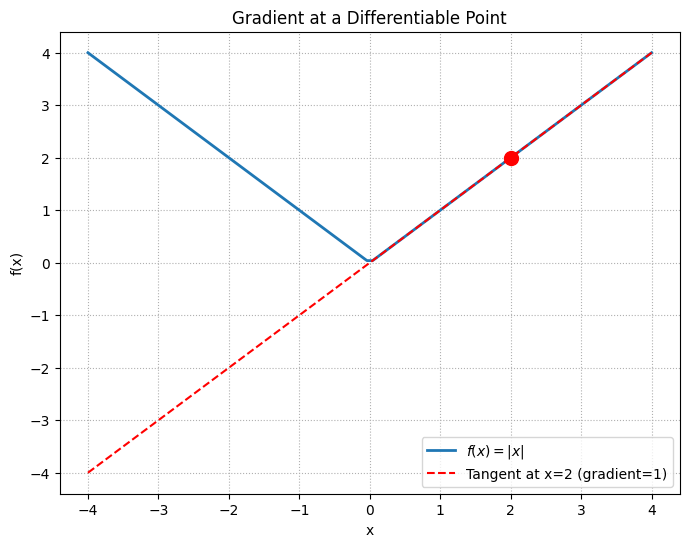

In [2]:
def f(x):
    return np.abs(x)

x_range = np.linspace(-4, 4, 100)
y_range = f(x_range)

# 기준점
x0 = 2
y0 = f(x0)

# x=2에서 그래디언트는 1
gradient = 1
tangent_line = gradient * (x_range - x0) + y0

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_range, label='$f(x) = |x|$', lw=2)
plt.plot(x_range, tangent_line, 'r--', label=f'Tangent at x=2 (gradient={gradient})')
plt.scatter([x0], [y0], color='red', s=100, zorder=5)
plt.title('Gradient at a Differentiable Point')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, linestyle=':')
plt.show()

#### 2. 미분 불가능한 지점 ($x=0$)에서의 서브그래디언트

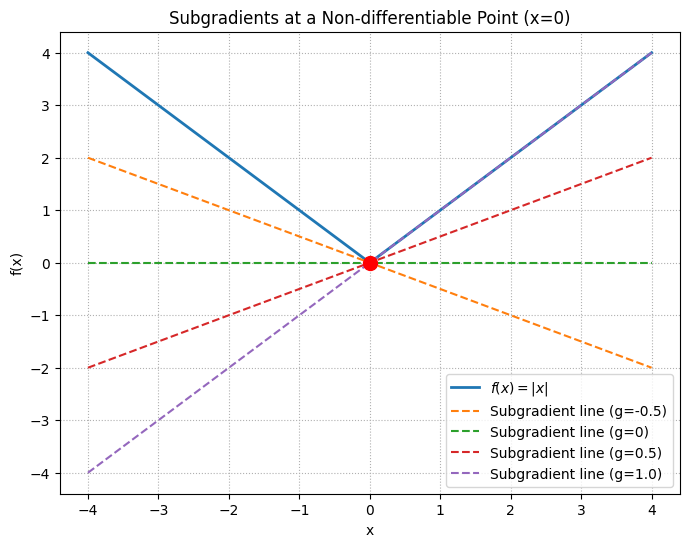

In [3]:
# 기준점
x0 = 0
y0 = f(x0)

# x=0에서 서브디퍼런셜은 [-1, 1]
subgradients = [-0.5, 0, 0.5, 1.0]

plt.figure(figsize=(8, 6))
plt.plot(x_range, y_range, label='$f(x) = |x|$', lw=2)

# 서브그래디언트가 만드는 여러 지지선을 시각화
for g in subgradients:
    subgradient_line = g * (x_range - x0) + y0
    plt.plot(x_range, subgradient_line, linestyle='--', label=f'Subgradient line (g={g})')

plt.scatter([x0], [y0], color='red', s=100, zorder=5)
plt.title('Subgradients at a Non-differentiable Point (x=0)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, linestyle=':')
plt.show()

### 고려사항 (Considerations)

* **서브그래디언트 방법 (Subgradient Method)**: 서브그래디언트를 이용한 최적화 방법은 경사 하강법과 매우 유사함. 파라미터 $\theta$를 업데이트할 때, 그래디언트 $\nabla f(\theta)$ 대신 서브디퍼런셜 $\partial f(\theta)$에 속하는 아무 서브그래디언트 $g$나 선택하여 사용함.
$$ \theta_{k+1} := \theta_k - \eta_k g_k \quad (\text{where } g_k \in \partial f(\theta_k)) $$

* **비-하강 방향 (Non-descent Direction)**: 그래디언트와 달리 서브그래디언트의 반대 방향이 반드시 함수 값을 감소시키는 하강 방향이라는 보장이 없음. 따라서 서브그래디언트 방법을 사용하면 비용 함수 값이 중간에 증가할 수도 있음. 일반적으로 전체 반복 과정에서 가장 좋았던 파라미터를 따로 저장하여 최종 결과로 사용함.

* **학습률 (Step Size)**: 서브그래디언트 방법이 최적점에 수렴하기 위해서는 학습률($\eta_k$)을 신중하게 선택해야 함. 보통 학습이 진행됨에 따라 학습률을 점차 줄이는 방식을 사용함.

### 최종 요약 (Conclusion)

서브그래디언트는 미분 불가능한 볼록 함수에 대한 그래디언트의 개념적 확장임. 함수의 특정 지점에서 미분이 정의되지 않더라도, 서브그래디언트를 통해 함수의 값을 줄일 수 있는 방향에 대한 정보를 얻을 수 있음.

이 노트북에서는 절댓값 함수를 예로 들어, 미분 가능한 점에서는 그래디언트가 유일하게 정의되지만 미분 불가능한 '뾰족점'에서는 다양한 서브그래디언트가 존재함을 시각적으로 확인함. 이 개념 덕분에 MAE와 같은 손실 함수를 사용하는 모델도 경사 하강법 기반의 최적화를 수행할 수 있게 됨.